## 7.1 경진대회 이해
- 이진 분류
- 각 피쳐와 타깃값의 의미를 알 수 없음
- 데이터는 모두 범주형

## 7.2 탐색적 데이터 분석

In [30]:
import pandas as pd

path = 'data/cat-in-the-dat/'

train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id') 
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

print(train.shape, test.shape)

(300000, 24) (200000, 23)


In [31]:
train.head().T

id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


피쳐 요약표 : 피쳐별 데이터 타입, 결측값 개수, 고윳값 개수, 실제 입력값 등

해석 
1) 이진 피쳐 : 결측값 없음 => 0,1로 인코딩
2) 명목형 피쳐 : 결측값 없음, 고윳값 다르고 의미없는 값 입력 데이터 존재
3) 순서형 피쳐 : 순서에 따라 타깃값에 미치는 영향 존재
- ord_1 : 캐글 등급 / ord_2 : 춥고 더운 정도 / ord_3, 4, 5 : 알파벳 순 인코딩 

In [32]:
def resumetable(df):
    print(f"데이터 셋 형상 : {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index':'피쳐'})
    summary['결측값 갯수'] = df.isnull().sum().values
    summary['고유값 갯수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터 셋 형상 : (300000, 24)


,피쳐,데이터 타입,결측값 갯수,고유값 갯수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [33]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f"{feature} 고윳값 : {train[feature].unique()}")

ord_0 고윳값 : [2 1 3]
ord_1 고윳값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고윳값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [34]:
for i in range(3,6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값 : {train[feature].unique()}')

ord_3 고윳값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고윳값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고윳값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [35]:
print('day 고윳값: ', train['day'].unique())
print('month 고윳값: ', train['month'].unique())
print('target 고윳값: ', train['target'].unique())

day 고윳값:  [2 7 5 4 3 1 6]
month 고윳값:  [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값:  [0 1]


### 7.2.2 데이터 시각화
타깃값 분포 : 타깃값 불균형 파악 후, 부족한 타깃값에 더 집중해 모델링

In [36]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

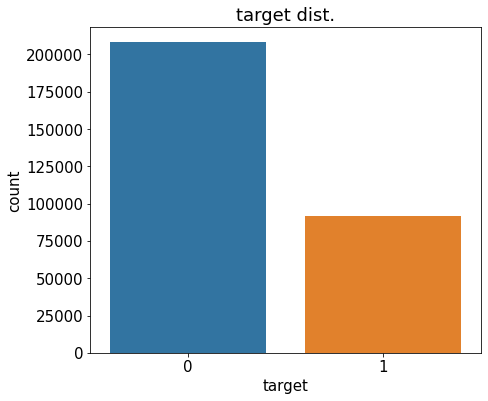

In [37]:
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
ax.set_title("target dist.");

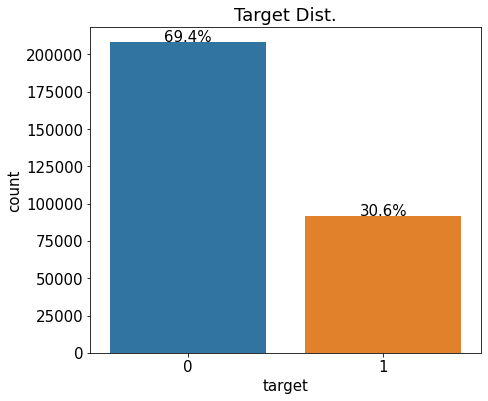

In [38]:
# ax.patches : 그래프 도형 객체 모두를 담은 리스트
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(x = left_coord + width/2.0,
               y = height + total_size*0.001,
               s = f'{percent:1.1f}%',
               ha = 'center',
               )
        
plt.figure(figsize=(7,6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Dist.');

이진 피쳐 분포
- 범주형 비쳐의 타깃값 분포를 고윳값 별로 구분해 그려서, 특정 고윳값이 특정 타깃값에 치우치는지 확인

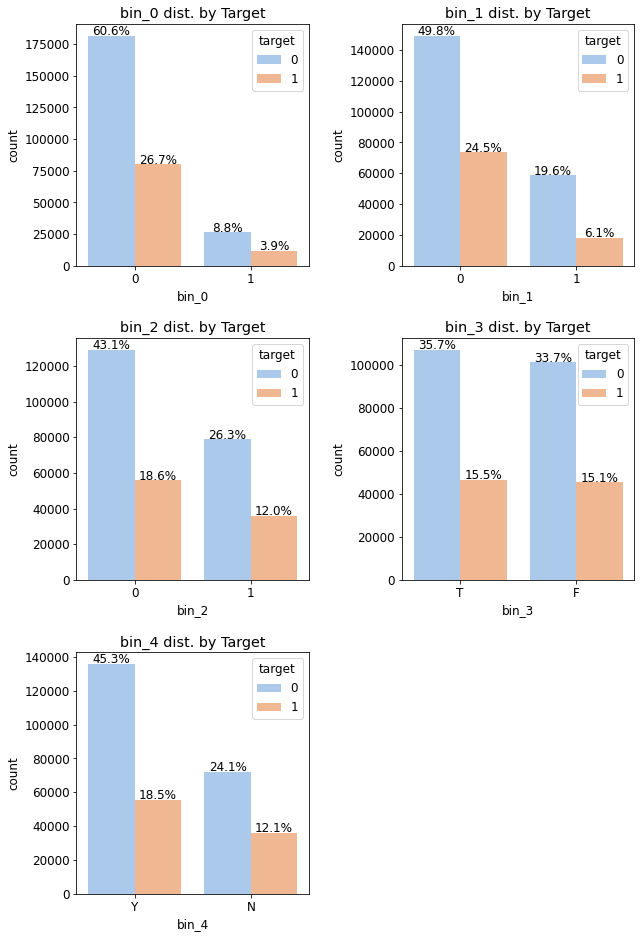

In [39]:
import matplotlib.gridspec as gridspec

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 서브플롯 배치
plt.figure(figsize=(10,16))
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 여백

bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4']

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])
    
    sns.countplot(x=feature, data=train,
                 hue='target', palette = 'pastel', ax=ax);
    ax.set_title(f"{feature} dist. by Target")
    write_percent(ax, len(train))

명목형 피쳐 분포
- nom5 ~ 9는 의미가 알 수 없는 문자열이므로, 0-4만 확인
- nom1~4 피쳐는 고윳값 별로 타깃값 1의 비율이 서로 달라서, 타깃값에 대한 예측 능력이 있음

1) 교차분석표 생성 함수 : 범주형 데이터 2개 비교분석 => 명복형 피쳐별 타깃값 비교분석
2) 포인트 플롯 생성 함수 : 표차분석표 포인트플롯 중복 생성
3) 피쳐 분포도 및 피처별 타깃값 1 비율 포인트 플롯 생성함수

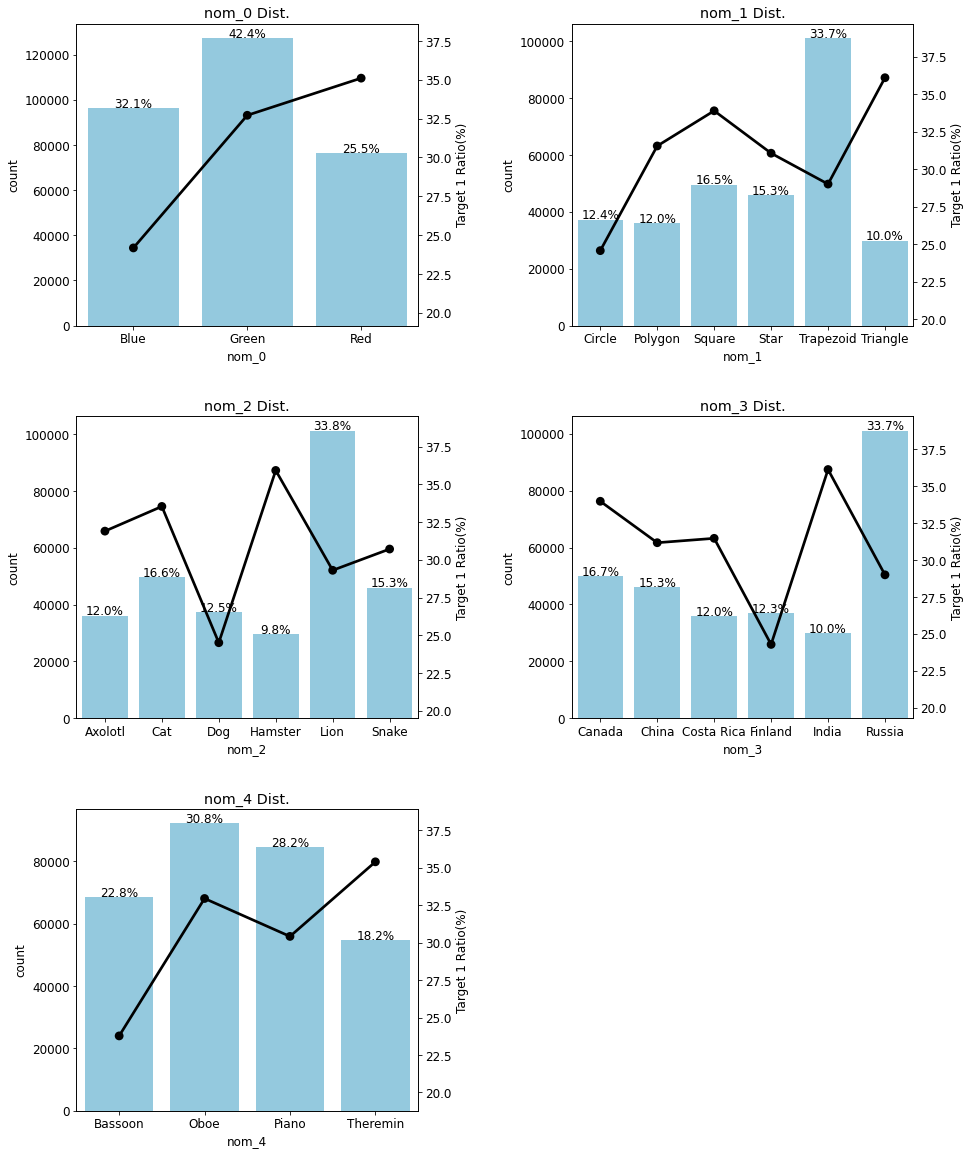

In [40]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    
    return crosstab

def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축 공유하고 y축 공유하지 않는 새로운 축
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                       order=crosstab[feature].values, color='black',
                       legend=False);
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
    ax2.set_ylabel("Target 1 Ratio(%)")
    
def plot_cat_dist_with_true_ratio(df,features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size)
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
    
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature)
        
        sns.countplot(x=feature, data=df, 
                     order=crosstab[feature].values,
                     color='skyblue', ax=ax)
        
        write_percent(ax, len(df))
        
        plot_pointplot(ax, feature, crosstab)
        
        ax.set_title(f"{feature} Dist.")
    
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

순서형 피쳐 분포
- ord_1, ord_2는 피쳐값들의 순서정렬
- 4,5도 고윳값 순서에 따라 타깃값이 1인 비율 증가 : 모든 그래프에서 순서와 비율 사이에 상관관계가 있으므로, 순서형 피쳐 중에서도 필요없는 피쳐는 없음

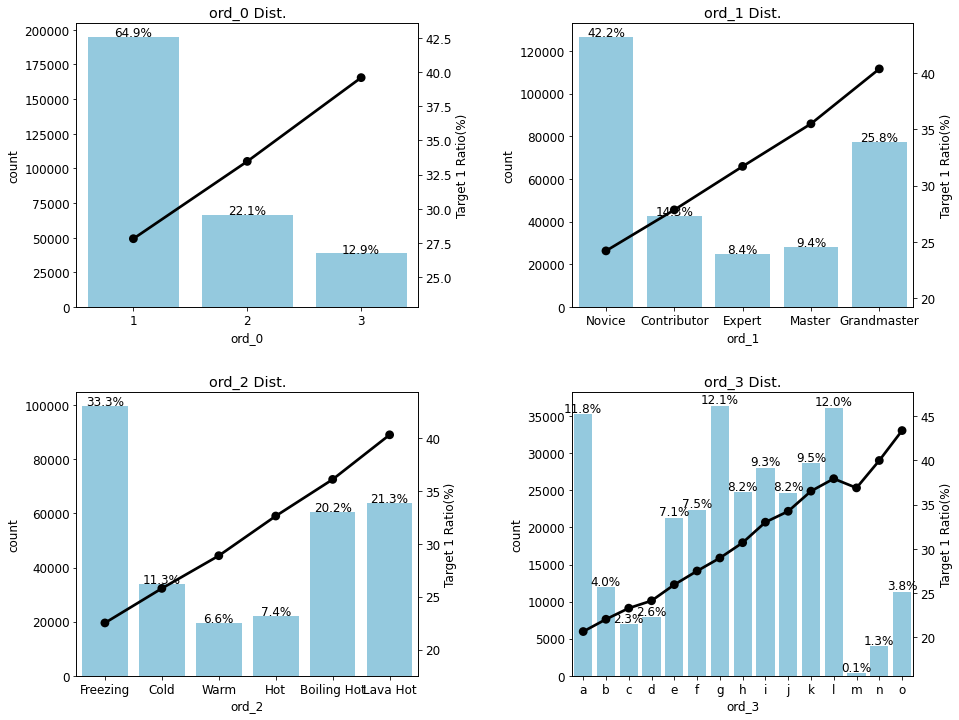

In [41]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot','Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

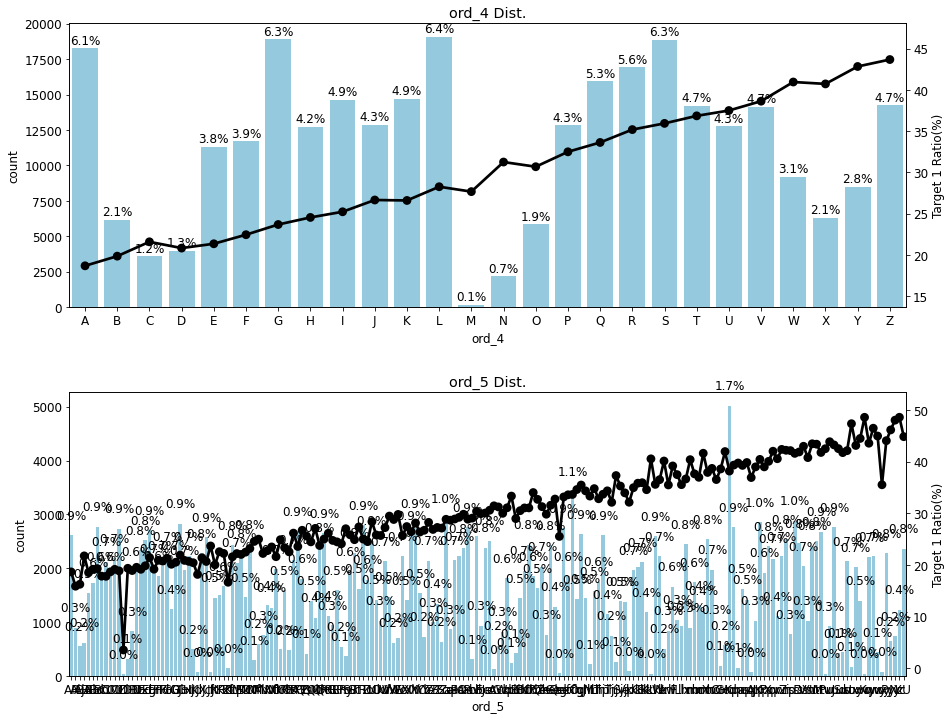

In [42]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'],
                             num_rows=2, num_cols=1, size=(15,12))

날짜 피쳐 분포
- day, month는 다소 반대양상
- 모두 피쳐 값이 숫자인데, 1->2는 가까운 데이터이나, 12->1도 한달 차이지만 모델은 그렇게 보지 않을 것 => 이런 순환형 데이터는 삼각함수 인코딩 필요 / 하지만 이 데이터는 데이터가 그리 크지 않아서 효과발휘 못함 **원-핫 인코딩 적용**

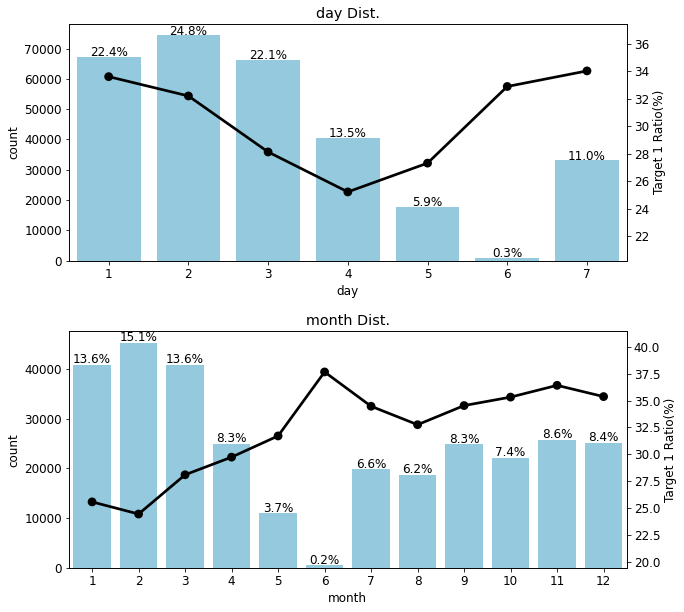

In [43]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                             num_rows=2, num_cols=1, size=(10,10))

## 7.3 베이스라인 모델

In [44]:
import pandas as pd

path = 'data/cat-in-the-dat/'

train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id')
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

### 7.3.1 피쳐 엔지니어링
데이터 합치기 : 훈련 데이터와, 테스트 데이터에 동일한 인코딩 적용을 위해 합침, 그런 다음 합친 데이터에서 타깃값을 제거함 => 피쳐와 타깃값은 따로 분리해서 모델링 필요

In [45]:
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1)
all_data

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,c389000ab,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,4cd920251,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,de9c9f684,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,4ade6ab69,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,cb43ab175,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,0,0,0,F,N,Green,Square,Lion,Canada,Theremin,...,9e4b23160,acc31291f,1,Novice,Lava Hot,j,A,Gb,1,3
499996,1,0,0,F,Y,Green,Trapezoid,Lion,China,Piano,...,cfbd87ed0,eae3446d0,1,Contributor,Lava Hot,f,S,Ed,2,2
499997,0,1,1,T,Y,Green,Trapezoid,Lion,Canada,Oboe,...,1108bcd6c,33dd3cf4b,1,Novice,Boiling Hot,g,V,TR,3,1


원-핫 인코딩

In [46]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

데이터 나누기

In [47]:
from sklearn.model_selection import train_test_split

num_train = len(train)

X_train = all_data_encoded[:num_train]
X_test = all_data_encoded[num_train:]

y = train['target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                     test_size=0.1, stratify=y,
                                                     random_state=10)

### 7.3.2 모델 훈련 및 검증

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

y_valid_preds = logistic_model.predict_proba(X_valid)[:,1]

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'valid roc_auc : {roc_auc}')

valid roc_auc : 0.7965190096532034


### 7.3.4 예측 및 결과 제출

In [49]:
y_preds = logistic_model.predict_proba(X_test)[:,1]

submission['target'] = y_preds
submission.to_csv('submission.csv')

## 7.4 성능 개선
1) 피쳐 맞춤 인코딩 : ord1, ord2 수작업 / ord3,4,5 ordinal 인코딩 / 명목형, 날짜 : 원-핫 인코딩
2) 피쳐 스케일링 : 이진 피쳐는 값이 두 개라, 원-핫 인코딩 피쳐도 0,1로 구성될거라 스케일링 안해줘도 됨
3) 하이퍼파라미터 최적화

In [50]:
import pandas as pd

path = 'data/cat-in-the-dat/'

train = pd.read_csv(path + 'train.csv', index_col='id')
test = pd.read_csv(path + 'test.csv', index_col='id')
submission = pd.read_csv(path + 'sample_submission.csv', index_col='id')

### 7.4.1 피쳐 맞춤 인코딩
- 인코딩 전 데이터 합치기

In [53]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

## 이진형 피쳐
all_data = pd.concat([train, test])
all_data = all_data.drop('target', axis=1)

all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

## 순서형 피쳐 : 정해진 순서대로 정렬
ord1dict = {'Novice' : 0, 'Contributor' : 1, 'Expert' : 2,
           'Master' : 3, 'Grandmaster' : 4}
ord2dict = {'Freezing' : 0, 'Cold' : 1, 'Warm' : 2, 
           'Hot' : 3, 'Boiling Hot' : 4, 'Lava Hot' : 5}

all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

## 순서형 피쳐 : 알파벳 정렬
ord_345 = ['ord_3', 'ord_4', 'ord_5']
ord_encoder = OrdinalEncoder()

all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

for feature, categories in zip(ord_345, ord_encoder.categories_):
    print(feature)
    print(categories)


## 명목형 피쳐 :원-핫 인코딩 시 열 개수가 늘어나서 곧바로 인코딩이 불가능하므로, 별도 행렬에 저장 필요
nom_features = ['nom_' + str(i) for i in range(10)]

onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])

all_data = all_data.drop(nom_features, axis=1) # 합치기 전 기존 명목형 피쳐 삭제

## 날짜 피쳐
date_features = ['day', 'month']

encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1) # 합치기 전 기존 날짜 피쳐 삭제

ord_3
['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o']
ord_4
['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R'
 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z']
ord_5
['AP' 'Ai' 'Aj' 'BA' 'BE' 'Bb' 'Bd' 'Bn' 'CL' 'CM' 'CU' 'CZ' 'Cl' 'DH'
 'DN' 'Dc' 'Dx' 'Ed' 'Eg' 'Er' 'FI' 'Fd' 'Fo' 'GD' 'GJ' 'Gb' 'Gx' 'Hj'
 'IK' 'Id' 'JX' 'Jc' 'Jf' 'Jt' 'KR' 'KZ' 'Kf' 'Kq' 'LE' 'MC' 'MO' 'MV'
 'Mf' 'Ml' 'Mx' 'NV' 'Nf' 'Nk' 'OR' 'Ob' 'Os' 'PA' 'PQ' 'PZ' 'Ps' 'QM'
 'Qb' 'Qh' 'Qo' 'RG' 'RL' 'RP' 'Rm' 'Ry' 'SB' 'Sc' 'TR' 'TZ' 'To' 'UO'
 'Uk' 'Uu' 'Vf' 'Vx' 'WE' 'Wc' 'Wv' 'XI' 'Xh' 'Xi' 'YC' 'Yb' 'Ye' 'ZR'
 'ZS' 'Zc' 'Zq' 'aF' 'aM' 'aO' 'aP' 'ac' 'av' 'bF' 'bJ' 'be' 'cA' 'cG'
 'cW' 'ck' 'cp' 'dB' 'dE' 'dN' 'dO' 'dP' 'dQ' 'dZ' 'dh' 'eG' 'eQ' 'eb'
 'eg' 'ek' 'ex' 'fO' 'fh' 'gJ' 'gM' 'hL' 'hT' 'hh' 'hp' 'iT' 'ih' 'jS'
 'jV' 'je' 'jp' 'kC' 'kE' 'kK' 'kL' 'kU' 'kW' 'ke' 'kr' 'kw' 'lF' 'lL'
 'll' 'lx' 'mb' 'mc' 'mm' 'nX' 'nh' 'oC' 'oG' 'oH' 'oK' 'od' 'on' 'pa'
 'ps' 'qA' 'qJ' 'qK' 'qP' 'qX' '

### 7.4.2 피쳐 스케일링
- 수치형 피쳐들의 유효값 범위 맞추기

In [54]:
## 순서형 피쳐
from sklearn.preprocessing import MinMaxScaler

ord_features = ['ord_' + str(i) for i in range(6)]

all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [55]:
## 인코딩 및 스케일링 피쳐 합치기
from scipy import sparse

all_data_sprs = sparse.hstack([
    sparse.csr_matrix(all_data), encoded_nom_matrix, encoded_date_matrix
], format='csr')

In [56]:
## 데이터 나누기
from sklearn.model_selection import train_test_split

num_train = len(train)

X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:]

y = train['target']

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y,
                                                     test_size=0.1, stratify=y, random_state=10)

### 7.4.3 하이퍼 파라미터 최적화
- C : 규제강도 조절, 작을수록 규제 강도 강해짐

In [60]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

lr_params = {'C' : [0.1, 0.125, 0.2], 'max_iter' : [800, 900, 1000],
            'solver' : ['liblinear'], 'random_state':[42]}

gridsearch_logistic_model = GridSearchCV(estimator=logistic_model, param_grid=lr_params, scoring='roc_auc', cv=5)

gridsearch_logistic_model.fit(X_train, y_train)
print(gridsearch_logistic_model.best_params_)

{'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}
CPU times: user 12min 12s, sys: 2min 18s, total: 14min 31s
Wall time: 3min 48s


### 7.4.4 모델 성능 검증

In [61]:
from sklearn.metrics import roc_auc_score

y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]

roc_auc = roc_auc_score(y_valid, y_valid_preds)

print(f'valid roc auc: {roc_auc}')

valid roc auc: 0.8045294021451339


 ## 7.5 성능개선
 - 데이터 전체를 사용해 모델 훈련 : 일반적으로 여러가지 모델링을 해서 그 중 검증데이터 성능이 가장 높은 모델을 제출용으로 선정 / 이후 선정된 모델을 검증 데이터까지 포함한 전체 훈련 데이터로 다시 훈련하여 최종 제출 데이터로 사용

# 핵심 요약
1. 피쳐 요약표는 피처별 데이터 타입, 결측값 개수, 고유값 개수, 실제 입력값 등을 정리한 표
2. 타깃값 분포를 알면 데이터가 얼마나 불균형한지 파악하여 부족한 타깃값에 더 집중해 모델 수행 가능
3. 피쳐 별로 데이터 특성에 맞게 인코딩 필요
    - 이진 : 0,1이 아닌 경우 0,1로 인코딩
    - 명목형 : 고유값 개수가 너무 많지 않다면, 모델이 이해할 수 있도록 원-핫인코딩 적용
    - 순서형 : 고유값들의 순서에 맞게 인코딩
    - 날짜 : 순환형 데이터는 삼각함수를 사용하거나 원-핫 인코딩
4. 로지스틱 회귀는 선형 회귀방식을 이용해 분류에 적용
5. 피쳐 스케일링은 피쳐마다 값의 범위를 비슷하게 맞춰 값의 범위 일치